In [28]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import utils
import matplotlib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
from random import seed
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = (16, 8)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   
seed(1)
import pandas as pd 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline 
import numpy as np
plt.rcParams['figure.figsize'] = (16, 8)
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings(action="ignore")
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import utils

In [53]:
data = pd.read_csv('data/data.csv')

In [54]:
data = pd.DataFrame(data)

In [55]:
area_1 = data[data.variable == 'area_1'].drop('variable', axis = 1).dropna().sort_index().asfreq('H')
area_2 = data[data.variable == 'area_2'].drop('variable', axis = 1).dropna().sort_index().asfreq('H')
area_3 = data[data.variable == 'area_3'].drop('variable', axis = 1).dropna().sort_index().asfreq('H')


area_1 = area_1.resample("h").mean()
area_2 = area_2.resample("h").mean()
area_3 = area_3.resample("h").mean()

area_1 = area_1.fillna(area_1.mean())
area_2 = area_2.fillna(area_2.mean())
area_3 = area_3.fillna(area_3.mean())

area_1.head()

,value
1970-01-01,NaN


In [56]:
train_1 = area_1[:-168]
train_2 = area_2[:-168]
train_3 = area_3[:-168]

test_1 = area_1[-168:]
test_2 = area_2[-168:]
test_3 = area_3[-168:]
train_1.head()

,value


In [46]:
train_1_diff = train_1.diff()

In [47]:
train_1_diff.head()

,value


ZeroDivisionError: float division by zero

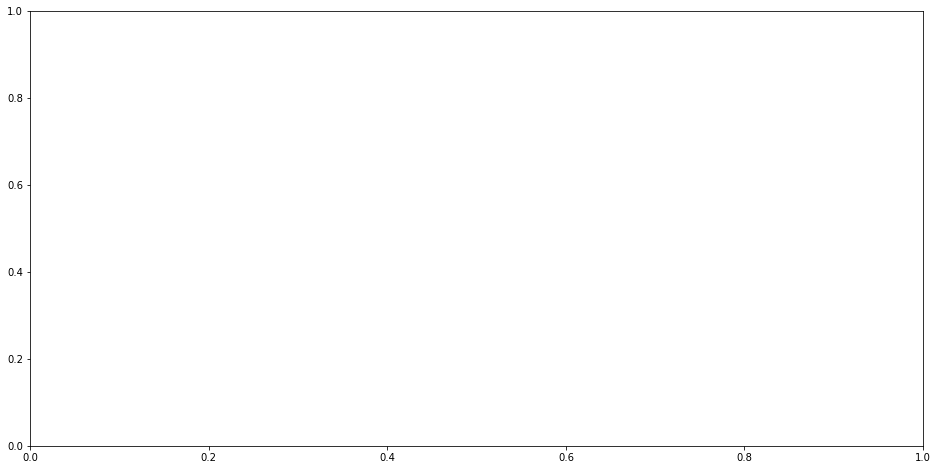

In [33]:
plot_pacf(train_1_logged, alpha=.05, lags=24)  
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()